Anteriormente habíamos comprovado cómo es interesante usar PCA después de la extracción de features aleatorios. Ahora vamos a ver cómo se comporta con RandomForest, pero vamos a usar un dataset más adecuado que antes, uno que solo tiene variables numéricas.
 
 En principio esto solo hay que implementarlo en python

In [1]:
# In[2]:


path = "../../datasets/falldetection/falldetection.csv"


# In[3]:


import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
df = pd.read_csv(path)


# In[4]:


N = df.shape[0]

prop_train = 2 / 3
N_train = np.ceil(N * prop_train).astype(np.int64)
N_test = N - N_train

data = df.drop(["ACTIVITY"], 1)
target = df.ACTIVITY

data_train = data.iloc[:N_train]
data_test = data.iloc[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]


# In[5]:


pipe = Pipeline([
    ("sampler",RBFSampler()),
    ("pca", PCA(n_components = 0.9, svd_solver = "full")),
    ("clf", RandomForestClassifier(n_estimators = 100))
])


# In[6]:


feats = list(range(10,300,30))


# In[ ]:


train_scores = []
test_scores = []
for f in feats:
    pipe.set_params(sampler__n_components = f)
    pipe.fit(data_train, target_train)
    train_score = pipe.score(data_train, target_train)
    test_score = pipe.score(data_test, target_test)
    
    train_scores.append(train_score)
    test_scores.append(test_scores)


# In[ ]:


plt.plot(feats, train_scores, label = "Train scores")
plt.plot(feats, test_scores, label = "Test scores")
plt.grid(True)
plt.legend()
plt.xlabel("Number of features")
plt.ylabel("Accuracy")

KeyboardInterrupt: 

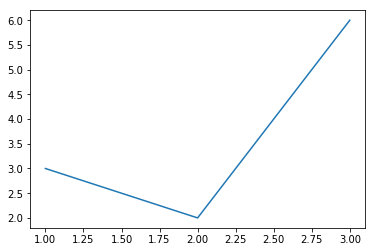

In [5]:
plt.plot([1,2,3],[3,2,6])